In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import cufflinks as cf


In [2]:
dataset = pd.read_csv("kalimati_tarkari_dataset.csv")
dataset

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0
...,...,...,...,...,...,...,...
197156,197156,Garlic Dry Nepali,2021-05-13,Kg,100.0,120.0,110.0
197157,197157,Fish Fresh(Rahu),2021-05-13,KG,270.0,280.0,275.0
197158,197158,Fish Fresh(Bachuwa),2021-05-13,KG,225.0,235.0,230.0
197159,197159,Fish Fresh(Chhadi),2021-05-13,KG,220.0,230.0,225.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197161 entries, 0 to 197160
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SN         197161 non-null  int64  
 1   Commodity  197161 non-null  object 
 2   Date       197161 non-null  object 
 3   Unit       197161 non-null  object 
 4   Minimum    197161 non-null  float64
 5   Maximum    197161 non-null  float64
 6   Average    197161 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 10.5+ MB


In [4]:
dataset = pd.read_csv("kalimati_tarkari_dataset.csv", index_col=1)
dataset

,SN,Date,Unit,Minimum,Maximum,Average
Commodity,,,,,,
Tomato Big(Nepali),0,2013-06-16,Kg,35.0,40.0,37.5
Tomato Small(Local),1,2013-06-16,Kg,26.0,32.0,29.0
Potato Red,2,2013-06-16,Kg,20.0,21.0,20.5
Potato White,3,2013-06-16,Kg,15.0,16.0,15.5
Onion Dry (Indian),4,2013-06-16,Kg,28.0,30.0,29.0
...,...,...,...,...,...,...
Garlic Dry Nepali,197156,2021-05-13,Kg,100.0,120.0,110.0
Fish Fresh(Rahu),197157,2021-05-13,KG,270.0,280.0,275.0
Fish Fresh(Bachuwa),197158,2021-05-13,KG,225.0,235.0,230.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197161 entries, Tomato Big(Nepali) to Fish Fresh(Mungari)
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   SN       197161 non-null  int64  
 1   Date     197161 non-null  object 
 2   Unit     197161 non-null  object 
 3   Minimum  197161 non-null  float64
 4   Maximum  197161 non-null  float64
 5   Average  197161 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 10.5+ MB


In [6]:
cf.go_offline()

datavisual = dataset.loc["Potato Red"]
datavisual["SMA-50"] = datavisual["Minimum"].rolling(50).mean()
datavisual["SMA-200"] = datavisual["Minimum"].rolling(200).mean()
datavisual

,SN,Date,Unit,Minimum,Maximum,Average,SMA-50,SMA-200
Commodity,,,,,,,,
Potato Red,2,2013-06-16,Kg,20.0,21.0,20.5,NaN,NaN
Potato Red,76,2013-06-17,Kg,20.0,21.0,20.5,NaN,NaN
Potato Red,149,2013-06-18,Kg,19.0,20.0,19.5,NaN,NaN
Potato Red,222,2013-06-19,Kg,20.0,21.0,20.5,NaN,NaN
Potato Red,295,2013-06-20,Kg,20.0,21.0,20.5,NaN,NaN
...,...,...,...,...,...,...,...,...
Potato Red,196712,2021-05-09,Kg,35.0,38.0,36.5,31.74,44.290
Potato Red,196803,2021-05-10,Kg,35.0,38.0,36.5,31.94,43.955
Potato Red,196894,2021-05-11,Kg,35.0,38.0,36.5,32.14,43.630


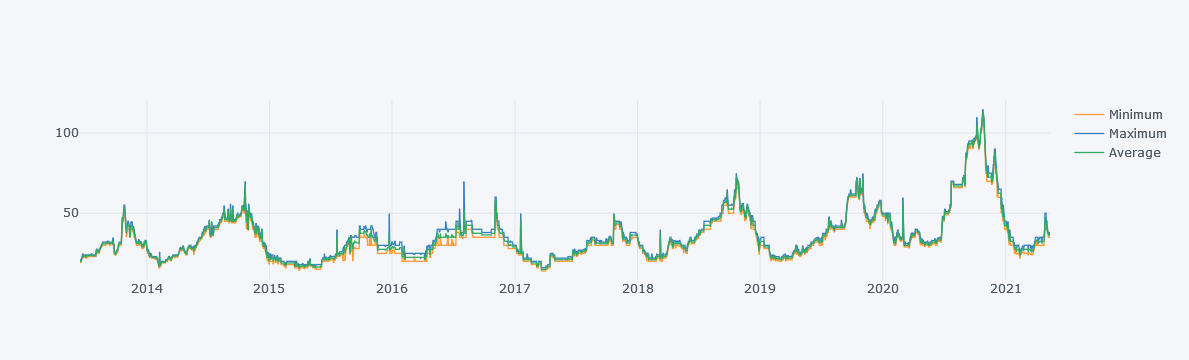

In [7]:

olahGrafik = datavisual.loc["Potato Red", ("Minimum", "Maximum", "Average", "Date")]
olahGrafik.iplot(x="Date")